In [69]:
# LOAD MODULES
from IPython.core.display import display, HTML # for max width
display(HTML("<style>.container { width:80% !important; }</style>"))
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
from spacy.tokens import Doc, Span, Token
import scattertext as st
from IPython.display import IFrame
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import spatial
cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)
import spacy # software for analysing text
from spacy import displacy
nlp = spacy.load('en_core_web_md') # a medium english language model
import warnings
warnings.filterwarnings('ignore')

# LOAD FUNCTIONS
def compareMeanings(words):
    # calculate similarities
    pca = PCA(n_components=2)
    pca.fit([nlp(word).vector for word in words])
    word_vecs_2d = pca.transform([nlp(word).vector for word in words])
    
    # create plot 
    plt.figure(figsize=(5,5))
    plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])
    # for each word and coordinate pair: draw the text on the plot
    for word, coord in zip(words, word_vecs_2d):
        x, y = coord
        plt.text(x, y, word, size= 15)
    plt.savefig('fig.jpg', dpi=1000)
    # show the plot
    plt.show()
    
    
def mathsOnMeaning(start, subtract, add):
    x = nlp.vocab[start].vector - nlp.vocab[subtract].vector + nlp.vocab[add].vector
    
    similar_words = []
    for word in nlp.vocab:
        if not (word.has_vector & word.is_lower):
            continue
        if not ((word.text!=start)&(word.text!=add)&(word.text!=subtract)):
            continue
     
        similarity = cosine_similarity(x, word.vector)
        similar_words.append((word, similarity))
        
    similar_words = sorted(similar_words, key=lambda item: -item[1])
    result = [w[0].text for w in similar_words[:5]][0]
    print(f"'{start}' minus '{subtract}' add '{add}' = {result}")
    
def scattertextTag(tag):
    def getX(doc):
        out = [x.text for x in doc if (x.tag_ in [tag])]
        return nlp(' '.join(out))
    df['text_x'] = df['text_doc'].apply(getX)
    
    corpus = st.CorpusFromParsedDocuments(df, 
                                          parsed_col='text_x',
                                category_col='post_type'
                                         ).build()
    html = st.produce_scattertext_explorer(corpus,
             category='story',
             category_name='Patient Criticism',
             not_category_name='Staff Responses',
             #characteristic_scorer=None,
             alternative_text_field='post_body',
             show_characteristic=False,                              
             width_in_pixels=800)
    return html

def scattertextThemes(topics):
    topic_feature_builder = st.FeatsFromTopicModel(topics)
    
    #CREATE CORPUS
    corpus = st.CorpusFromParsedDocuments(df, 
                                          parsed_col='text_doc',
                                          category_col='post_type',
                                          feats_from_spacy_doc=topic_feature_builder
                                          ).build()
    
    # CREATE PLOT
    html = st.produce_scattertext_explorer(corpus,
                                          category='story',
                                          category_name='Patient Criticism',
                                          not_category_name = 'Hospital Response',
                                          width_in_pixels=600,
                                           height_in_pixels=400,
                                          show_characteristic=False,
                                           use_non_text_features=True,
                                           show_top_terms=True,
                                          minimum_term_frequency=5,
                                          use_full_doc=True,
                                          p_value_colors=True,
                                          max_snippets = 11,
                                           pmi_threshold_coefficient=0,
                                        topic_model_term_lists=topic_feature_builder.get_top_model_term_lists()
                                          )
    return html

def findSentence(sentence_subject, sentence_objecet, sentence_contains):
    print('')
    if len(sentence_contains)>0:
        for doc in df.loc[df['post_type']=='response', 'text_doc']:
            for sent in doc.sents:
                for tok in sent:
                    if tok.text.lower() in sentence_contains:
                        for tok in sent:
                            if 'obj' in tok.dep_:
                                if tok.text.lower() in sentence_object:
                                    for tok in sent:
                                        if 'subj' in tok.dep_:
                                            if tok.text.lower() in sentence_subject:
                                                print(tok.sent)
                                                #displacy.render(tok.sent, jupyter=True, style='dep')
                                                break
    else:
        for doc in df.loc[df['post_type']=='response', 'text_doc']:
            for sent in doc.sents:
                for tok in sent:
                    if 'obj' in tok.dep_:
                        if tok.text.lower() in sentence_object:
                            for tok in sent:
                                if 'subj' in tok.dep_:
                                    if tok.text.lower() in sentence_subject:
                                        print(tok.sent)
                                        #displacy.render(tok.sent, jupyter=True, style='dep')
                                        break
print('Notebook loaded successfully')

OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Jupyter-notebook" data-toc-modified-id="Jupyter-notebook-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Jupyter notebook</a></span></li><li><span><a href="#Natural-Language-Processing-(NLP)" data-toc-modified-id="Natural-Language-Processing-(NLP)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Natural Language Processing (NLP)</a></span><ul class="toc-item"><li><span><a href="#Pre-2013:-Word-Frequency" data-toc-modified-id="Pre-2013:-Word-Frequency-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Pre-2013: Word Frequency</a></span></li><li><span><a href="#Post-2013" data-toc-modified-id="Post-2013-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Post-2013</a></span></li></ul></li><li><span><a href="#Word-embeddings" data-toc-modified-id="Word-embeddings-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Word embeddings</a></span><ul class="toc-item"><li><span><a href="#Find-words-used-in-similar-contexts" data-toc-modified-id="Find-words-used-in-similar-contexts-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Find words used in similar contexts</a></span></li><li><span><a href="#Comparing-word-meaning?" data-toc-modified-id="Comparing-word-meaning?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Comparing word meaning?</a></span></li><li><span><a href="#Comparing-sentence-meaning?" data-toc-modified-id="Comparing-sentence-meaning?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Comparing sentence meaning?</a></span></li><li><span><a href="#Scoring-sentences-against-target-meaning" data-toc-modified-id="Scoring-sentences-against-target-meaning-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Scoring sentences against target meaning</a></span></li><li><span><a href="#Adding-and-subtracting-meanings?" data-toc-modified-id="Adding-and-subtracting-meanings?-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Adding and subtracting meanings?</a></span></li><li><span><a href="#'Thought-vectors'" data-toc-modified-id="'Thought-vectors'-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>'Thought vectors'</a></span></li></ul></li><li><span><a href="#Hospital-Staff-Responding-to-Criticism" data-toc-modified-id="Hospital-Staff-Responding-to-Criticism-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hospital Staff Responding to Criticism</a></span><ul class="toc-item"><li><span><a href="#Research-context" data-toc-modified-id="Research-context-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Research context</a></span></li><li><span><a href="#Comparing-perspectives:-words" data-toc-modified-id="Comparing-perspectives:-words-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Comparing perspectives: words</a></span></li><li><span><a href="#Comparing-perspectives:-themes" data-toc-modified-id="Comparing-perspectives:-themes-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Comparing perspectives: themes</a></span></li><li><span><a href="#Which-responses-have-least-perspective-taking?" data-toc-modified-id="Which-responses-have-least-perspective-taking?-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Which responses have least perspective taking?</a></span></li><li><span><a href="#Which-responses-have-most-psychological-distancing?" data-toc-modified-id="Which-responses-have-most-psychological-distancing?-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Which responses have most psychological distancing?</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

# Jupyter notebook

[Jupyter notebooks](https://jupyter.org/) (and more recently Jupyter Lab) are language agnostic notebooks. They can run many languages, especially: **Ju**lia, **Pyt**hon, and **R**. 

Initiated in 2014, Jupyter notebooks have rapidly become a [dominant platform for data analysis](https://www.nature.com/articles/d41586-018-07196-1). There is good reason to believe that they will eventually [replace the scientific article](https://www.theatlantic.com/science/archive/2018/04/the-scientific-paper-is-obsolete/556676/) as we know it.

Scientific articles are texts that talk about data and analysis - but they don't allow readers to interact with the data or the analysis. Notebooks, are a step-change in scientific communication because they combine text, data, and analysis in one easy to read and reproducible package that is easy to share and interact with ([gallery of interesting notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)).

# Natural Language Processing (NLP)

NLP refers to using computers to search, manipulate and respond to human language

It is closely connected to AI, Machine Learning, Big Data

The driving motive is that Google, Facebook, etc. are investing vast resources in making computers understand text, image and sound in a way that matters for humans.

## Pre-2013: Word Frequency

To-date most psychological research using computers to analyse text has focused on word-frequency. Because the words we speak are closely connected to our thought patterns, this has produced several interesting results. For example:
- Identifying [authorship in Shakespeare's plays](http://elizabethan-theatre.org/wps/wp-content/uploads/2015/07/Double-Falsehood-by-Ryan-Boyd-Psychological-Science-2015.pdf)
- Longitudinal studies of Mayor [Giuliani's adaptation to the crisis of 9/11](https://www.sciencedirect.com/science/article/abs/pii/S0092656602923494)
- Detecting people's [personality from their writing style](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2885844/?_escaped_fragment_=po=2.77778)
- Monitoring [public anxiety](https://www.tandfonline.com/doi/abs/10.1080/10410236.2011.571759) and public mood (which is [associated with stock prices](https://arxiv.org/pdf/1010.3003&))

But, all these studies use fairly basic word count techniques, or, slightly more advanced sentiment analysis.

## Post-2013 

Word vectors, or 'word embeddings', developed in the late 1990s by Yoshua Bengio, Geoffrey Hinton, et al. But, their significance was only appreciated in about 2013.

Before about 2013, most computational analysis of words focused on the textual appearance of a word; for example, 'dog' was similar to 'doggy' (same stem), similar to 'god' (same letters) and 'hog' (2 letters in the same order), but without any similarity to 'cat' (no similar letters). There seemed to be no way to make computers understand that 'dog' and 'cat' are both family pets and thus semantically related.

The breakthrough came from Wittgenstein's (1953; also Frith, 1957) insight: the meaning of words comes from the context in which they are used. Consider the sentence 'the X sat on the mat' - most people would agree that 'dog' and 'cat' are plausible candidates for X. That is to say, 'dog' and 'cat' occupy similar roles within similar sentences. 

Word embeddings encode the meaning of words not in terms of the words themselves, but, in terms of the context in which the words appear. By analyzing billions of webpages and books, statistical models are built based on which words occur in the same context. These models _seem_ to encode meaning.

# Word embeddings

Google and other companies are using word embeddings to [map the meaning of all words](https://projector.tensorflow.org/) - created by analysing the sentence context in which words are used accross _all_ books, webpages, news sources and other archives.

## Find words used in similar contexts

In [6]:
%run "C:\Dropbox\2_Research\_Python_functions\functions_spacy_v11.ipynb"

Try single words, such as: 'blue', 'summer', 'university' or 'psychology'. <br>
Also, try combinations of words: 'sad happy' (yields 'hope'), 

In [25]:
getTokensNearVector(nlp, 'happy angry')

found nlp model:  en_core_web_lg-2.2.5

TOKENS NEAR VECTOR:    surprised unhappy afraid everyone worried mad too disappointed annoyed wanting imagine wonder everybody frustrated so glad confused pissed scared anxious sad crazy forget wanted shocked thought telling say even when obviously expecting always surprise worry know seriously though remember nothing hope seeing convinced wondering but enough still sure tell tired hoping lucky want reminded just sorry let saying because why again feel really bothered way get yet doubt guess curious yes concerned realize talking okay never 



## Comparing word meaning?
Most people would agree that 'dog' is more similar to 'cat' than 'road' - and the models agree:

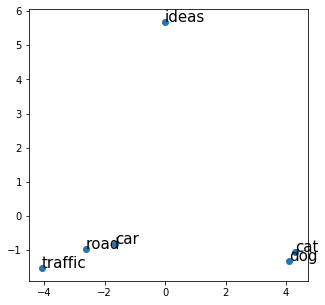

In [2]:
words = ['dog', 'cat', 'car', 'road', 'traffic', 'ideas']
    
compareMeanings(words)

## Comparing sentence meaning?

We can also use these models to compare sentences. Consider the following (all using unique words). Just by averaging the word embeddings for each sentence, we can see, that the model corresponds broadly to our human judgement. <br>
<br>
Change the sentences and re-run the cell to see the result.

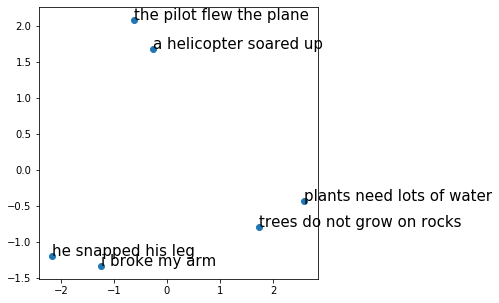

In [3]:
sentences = ['the pilot flew the plane', 
             'trees do not grow on rocks',
             'i broke my arm', 
             'he snapped his leg',
             'a helicopter soared up',
             'plants need lots of water']

compareMeanings(sentences)

## Scoring sentences against target meaning
The idea here comes from the [Garten et al. (2018)](https://link.springer.com/article/10.3758/s13428-017-0875-9) who argue that 

In [30]:
seed_terms = 'died'

sentences = ["Superb excellent ++",
             'accessible car park',
             'my arm broke', 
             'she was dying', 
             'he died later',
             'died died died']

for sent in sentences:
    score = round(nlp(sent).similarity(nlp(seed_terms)), 2)
    print("Similarity to 'died':  {:<4}  '{:}'".format(score, sent))

Similarity to 'died':  0.04  'Superb excellent ++'
Similarity to 'died':  0.2   'accessible car park'
Similarity to 'died':  0.4   'my arm broke'
Similarity to 'died':  0.68  'she was dying'
Similarity to 'died':  0.85  'he died later'
Similarity to 'died':  1.0   'died died died'


## Adding and subtracting meanings?
If words are represented as numbers, then, can we do mathematics with the meanings?

What if we start with the meaning of 'king' subtract 'man' and add 'woman' - what would the outcome be?

In [48]:
def mathsOnMeaning(start, subtract, add):
    x = nlp.vocab[start].vector - nlp.vocab[subtract].vector + nlp.vocab[add].vector
    
    similar_words = []
    for word in nlp.vocab:
        if not (word.has_vector & word.is_lower):
            continue
        if not ((word.text!=start)&(word.text!=add)&(word.text!=subtract)):
            continue
     
        similarity = cosine_similarity(x, word.vector)
        #similarity = word.similarity(x)
        similar_words.append((word, similarity))
        
    similar_words = sorted(similar_words, key=lambda item: -item[1])
    result = [w[0].text for w in similar_words[:5]][0]
    print(f"'{start}' minus '{subtract}' add '{add}' = {result}")

In [60]:
%run "C:\Dropbox\2_Research\_Python_functions\functions_spacy_v11.ipynb"

Here are the words near 'died dead and dying'. 

In [56]:
v = nlp('died').vector
getTokensNearVector(nlp, v)

found nlp model:  en_core_web_lg-2.2.5

TOKENS NEAR VECTOR:    died death born lived killed survived dying dead dies father buried resided was alive remembered later came perished after succumbed murdered tragically deceased became had mother drowned suffered grandfather shortly widow daughter brother disappeared since knew took happened apparently broke lives husband believed wife moved deaths passed he remembers grandson arrived who went late when years gone turned brought ended married lost once brother-in-law escaped whom d. sadly eldest uncle remarried stayed did eventually before last grandmother until succeeded ill sometime wounded cousin never departed fell hospitalized still suddenly there 



But, people tend to die in two ways: unintentional and intentional (murder). <br>
To find words associated with intentionall death, we subtract the concept of 'accident' and add the concept 'murder'.

In [57]:
v = nlp('died').vector - nlp('accident').vector + nlp('murder').vector
getTokensNearVector(nlp, v)

found nlp model:  en_core_web_lg-2.2.5

TOKENS NEAR VECTOR:    murder murdered died death murdering murders murderer killed killing hanged imprisoned born slaying lived convicted dead sentenced assassinated slain father alive dying killings widow acquitted survived prison brother mother buried murderers jailed assassination confessed daughter massacre raped guilty gunned arrested stabbed kill wife sons prisoner married kidnapping resided accused dies stepfather suicide jail indicted grandfather suspects massacred beheaded brother-in-law tortured killer daughters kidnapped raping whom brothers killers uncle treason husband martyred escaped fled pleaded condemned eldest believed slayings grandson martyr freed succeeded slaughtered murderous who rapist deceased was nephew lives cousin remembered crimes convict son 



Or, we can look at the words associated with 'died' excluding the 'murder' and focusing on 'accidents'.

In [58]:
v = nlp('died').vector + nlp('accident').vector - nlp('murder').vector
getTokensNearVector(nlp, v)

found nlp model:  en_core_web_lg-2.2.5

TOKENS NEAR VECTOR:    died accident crash crashed suffered accidents injured injuries wreck survived mishap hospitalized born collision was collided shortly tragically fatal perished after lived dying dies ambulance lost arrived later succumbed happened crashes passed occurred death resided wrecked remembered since traveled came hospital due casualty fatality luckily caused sometime had departed injury took motorcyclist collapsed fortunately recovering broke moved fell went when until buried unexpectedly stopped suddenly drowned travelled affected automobile before became killed last exited illness leaving stuck late disappeared realized catastrophic deceased badly once landed recuperating afterward hospitalised apparently sudden ended dead sadly fatalities rescued discovered damaged 



In [59]:
v = nlp('rome').vector + nlp('uk england').vector 
getTokensNearVector(nlp, v)

found nlp model:  en_core_web_lg-2.2.5

TOKENS NEAR VECTOR:    rome england italy uk europe london ireland britain france australia greece germany spain manchester usa zealand scotland canada dublin glasgow european birmingham sydney paris york edinburgh prague poland british chicago africa toronto leeds venice melbourne america liverpool wales netherlands atlanta florence amsterdam switzerland austria egypt athens ohio malta belgium columbus perth brisbane american orlando denmark cyprus holland boston roman sweden bristol italia nz florida hungary italian dallas newcastle india roma vancouver cambridge brighton indiana seattle washington milan georgia russia singapore berlin denver united virginia maryland mexico nyc asia richmond sheffield baltimore romania montreal barcelona australian ontario 



In [61]:
v = nlp('austria').vector
getTokensNearVector(nlp, v)


TOKENS NEAR VECTOR:    austria belgium switzerland netherlands finland germany hungary sweden denmark poland europe norway slovenia luxembourg vienna italy slovakia prague romania spain bulgaria moscow budapest austrian croatia salzburg holland cyprus malta russia france schweiz berlin argentina warsaw european graz iceland britain hamburg innsbruck czech deutschland amsterdam greece munich serbia zurich helsinki montreal andorra winnipeg u.k. wien estonia stockholm nederland england belfast zealand portugal monaco usa espana ukraine u.s. ireland arabia eire glasgow helena geneva europa leeds vermont albany albuquerque sheffield bavaria calgary ottawa lithuania edmonton cardiff dublin birmingham copenhagen boise u.s.a. bonn beijing uruguay edinburgh benelux frankfurt regina bremen columbus peru colombia 



In [62]:
start = 'he'
subtract = 'doctor'
add = 'woman'

start = 'doctor'
subtract = 'man'
add = 'woman'


v = nlp.vocab[start].vector - nlp.vocab[subtract].vector + nlp.vocab[add].vector
#print(v)

from scipy.spatial import distance
import numpy as np

# Format the vocabulary for use in the distance function
ids = [x for x in nlp.vocab.vectors.keys()]
vectors1 = [nlp.vocab.vectors[x] for x in ids]
vectors2 = np.array(vectors1)
#print(vectors2)
        
# measure distances
dist = distance.cdist([np.array(v)],vectors2)[0]
    
# create df of results
df = pd.DataFrame({'distance':[x for x in dist]})
df.sort_values('distance', inplace=True)

# print output
words = []
for i in df.index[:50]:
    word_id = ids[i]
    output_word = nlp.vocab[word_id].text
    output_word = output_word.lower()
    if output_word not in words:
        words.append(output_word.lower())
        
words         
#remove input tokens

['doctor',
 'nurse',
 'doctors',
 'pregnant',
 'physician',
 'woman',
 'gynecologist',
 'pharmacist',
 'midwife',
 'medical',
 'patient',
 'pediatrician',
 'pregnancy',
 'clinic',
 'surgeon',
 'obstetrician']

In [ ]:
getTokensNearVector(nlp, 'rome pizza')

In [ ]:
from scipy import spatial
cosine_similarity = lambda x, y: 1-spatial.distance.cosine(x, y)
print("apple vs banana: ", cosine_similarity(nlp.vocab['apple'].vector, nlp.vocab['banana'].vector))

In [63]:
start = 'king'
subtract = 'man'
add = 'woman'

mathsOnMeaning(start, subtract, add)

ValueError: Expected 2D array, got 1D array instead:
array=[ 5.14087021e-01 -2.78459996e-01  2.42767006e-01  4.54899669e-02
 -2.59425014e-01 -3.19999963e-01  3.23920012e-01 -6.71030045e-01
 -9.98499990e-02  1.91499996e+00 -5.68080008e-01 -2.74451017e-01
 -1.49906695e-01  8.01083148e-02 -2.34764010e-01 -1.10950008e-01
 -1.02593988e-01  8.53819966e-01 -2.68564999e-01  3.85140002e-01
 -1.36149988e-01  6.35029972e-01 -7.62044966e-01 -2.52770007e-01
 -6.75969958e-01  3.89851004e-01 -2.89680034e-01  1.75860003e-01
 -5.16229987e-01  5.21373034e-01 -1.89909995e-01  6.73759937e-01
  1.17550008e-01 -4.69896019e-01  5.88999987e-01  1.29447982e-01
 -5.71900010e-01 -5.47450066e-01 -4.84210014e-01  5.85503951e-02
  4.82379973e-01 -2.86769986e-01 -2.01718003e-01 -4.74729985e-01
  3.43068987e-01 -2.28827983e-01 -1.76439017e-01  6.05450034e-01
  2.07139999e-01 -2.89762974e-01 -7.63288975e-01  4.37090009e-01
 -2.06220001e-01 -4.20252979e-01  1.98040009e-01  3.18709970e-01
 -9.51815993e-02 -3.23054016e-01 -6.02343976e-01  2.33427018e-01
 -2.15409994e-02 -6.29774988e-01  3.72432500e-01  3.41740012e-01
  5.81782043e-01  7.02129960e-01  7.19299972e-01  3.28493983e-01
  3.36353004e-01  1.06999278e-03 -5.53239942e-01 -2.46219993e-01
 -6.37116969e-01 -1.72280014e-01  8.97620022e-01 -1.38548493e-01
 -5.71600199e-02  6.41870022e-01  3.89845997e-01 -3.98499995e-01
 -7.28532076e-01  9.17530134e-02 -3.40600014e-01  3.46671015e-01
 -2.63424516e-01  3.68355006e-01  8.78340006e-01 -1.57473043e-01
 -4.29450005e-01 -4.91259992e-01 -1.23234093e-02  3.27509999e-01
  1.44889995e-01 -3.27081025e-01  9.45929945e-01 -8.07909966e-01
 -2.07101002e-01 -8.87000561e-03 -5.59080057e-02  7.93069959e-01
  3.58245999e-01  6.05069995e-01  1.01848006e-01 -1.89061001e-01
  1.09030008e-02 -7.64109969e-01 -5.05369961e-01 -1.11367017e-01
  6.56607985e-01 -1.48448005e-01  1.30866021e-01  6.62039995e-01
 -1.54300034e-02 -4.17466015e-01 -4.54553008e-01 -5.05975008e-01
  4.15473014e-01  4.00425017e-01  7.88707018e-01 -5.19399941e-02
 -3.91889989e-01  8.31609964e-02  4.58730012e-01  1.23339996e-01
  2.39246994e-01  3.81098986e-01  1.86000004e-01  2.69684941e-02
 -5.55605292e-01  2.53284007e-01 -6.67639971e-01 -5.55985987e-01
 -3.71130019e-01 -6.53919995e-01 -1.09452009e-01 -6.04629993e-01
 -4.62760001e-01  3.97581995e-01 -3.26649994e-01  2.60998994e-01
 -2.09120011e+00 -2.76019007e-01  2.68036008e-01 -3.35714996e-01
 -4.75513011e-01 -2.83890069e-02  4.40270007e-01  2.24150002e-01
 -4.50639009e-01 -6.16590083e-01  1.10599995e-01 -3.00589710e-01
  1.24530017e-01  2.99279988e-01  3.03467005e-01 -3.42969984e-01
  3.93694013e-01 -5.84149957e-01 -1.88180000e-01  2.98162013e-01
 -1.80879980e-01 -3.70599926e-02  4.09860015e-02 -8.07899833e-02
  3.92280012e-01 -4.94572997e-01  4.01719987e-01  8.48469973e-01
 -1.94183022e-01  4.29439992e-01 -6.07819974e-01 -9.71959978e-02
  3.55786979e-01 -1.79980025e-02 -5.83269954e-01 -2.50129998e-01
  2.80330002e-01 -3.72725993e-01 -7.41009951e-01  1.03881419e-01
  8.04000199e-02 -1.64650023e-01  1.09247290e-01 -5.68639994e-01
  4.11399961e-01  5.69249988e-01 -2.14549989e-01 -1.56975001e-01
  9.64879990e-02  2.01149940e-01 -9.81989980e-01 -9.00639057e-01
  1.57496989e-01 -1.24968991e-01  9.11729932e-02 -5.17108977e-01
  6.34269863e-02  1.72169998e-01 -2.36945987e-01 -7.58899987e-01
  5.74868977e-01  6.10739946e-01  8.88329893e-02 -2.59585023e-01
 -9.03399587e-02 -8.53200257e-02  1.69609979e-01 -7.29799643e-03
 -2.05680996e-01 -1.93440005e-01 -4.92264986e-01  3.19920003e-01
 -3.66147995e-01  5.69279015e-01  6.27799928e-02  7.91899860e-02
 -3.93792808e-01  4.87831026e-01 -3.85988951e-02  7.52799988e-01
  1.74212992e-01 -6.07100964e-01  4.81240004e-01  1.49755001e-01
  4.32273030e-01  2.77104974e-01  4.56589013e-01 -3.32702011e-01
 -2.80999988e-01  6.35839045e-01  1.15425006e-01  7.80760050e-02
  3.17489982e-01 -4.80073988e-01  4.07790095e-02 -8.21070611e-01
 -1.63500011e-03 -3.97460014e-01 -9.85880196e-02 -5.31642020e-01
 -4.52499986e-02 -4.23010021e-01  1.44284993e-01 -7.62080014e-01
  2.15179995e-01 -7.05516994e-01  6.44015014e-01 -9.44310054e-02
 -5.36169946e-01 -1.31442308e+00  4.51058030e-01  1.44240022e-01
  3.84460092e-02 -1.80320218e-02 -2.95219988e-01  4.90060002e-01
  3.83020639e-02 -1.70519948e-02 -7.32708037e-01  5.04490495e-01
  1.77098006e-01  5.36670089e-02 -2.40814000e-01 -8.20799917e-02
  2.19249994e-01 -4.58490014e-01  3.68449986e-01  3.09300005e-01
 -1.21967995e+00 -2.55998999e-01 -8.38758051e-01 -1.99926004e-01
 -3.38140011e-01 -8.05199146e-03  1.42598450e-02 -3.56069952e-01
  8.31499994e-02  2.89311975e-01  5.29001653e-03 -1.11837029e-01
  1.28127396e+00  8.09929967e-01  5.58990002e-01 -2.18623012e-01
 -1.70580015e-01  7.43115008e-01 -1.40369982e-01  2.97093987e-01
 -3.28552961e-01 -3.10106993e-01  1.80748999e-01  3.05629998e-01
  2.17199922e-02 -4.68929976e-01 -1.95840016e-01  6.82327509e-01
 -2.89168000e-01 -7.09619969e-02  8.64340067e-01 -3.79067004e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

- Try: 'uk' minus 'london' add 'geneva'
- Try: 'berlin' minus 'germany' add 'france'
- Try: 'india' minus 'curry' add 'pizza'
- Try: 'man' minus 'boy' add 'girl'
- Try: 'paris' minus 'france' add 'uk'

## 'Thought vectors'

Geoffrey Hinton, one of the developers of 'deep learning' techniques, talks about the above examples that focus on single words as only the first step: he (and Google) are working towards 'thought vectors'. 

While the above examples represent the meanings of words in a 300 dimensional mathematical space, they aim to map thoughts, ideas, sentences, and even whole articles and books into a multi-million dimensional space.

Transcritpts, texts, and even audio-visual data will become open ho high-level semantic analysis (meaning clusters, emotion, contradictions, meta-perspectives and dialogical tensions).

- Longitudinal analyses of an individual life-course
- Comparison of perspectives of groups in conflict
- Identifying the emergence of novelty and new ideas

And, all done, on any size of dataset, in real-time, and for almost zero cost.

# Hospital Staff Responding to Criticism 
Accidents in hospitals are a leading cause of death. At least 10% of people going into hospital come out with a new health problem. Causes include: delays, hospital infections, errors, wrong-site surgery, misdiagnosis, medication errors, not reading patient notes etc. 

While aviation, construction, and heavy industry have all become much safer over the last 50 years, healthcare has remained dangerous, and seems resistant to improvement. Some hospitals have a 'blame culture' with high defensiveness.

One idea is that medical staff could learn from patients: patients know their own bodies, are usually the only person who has been at all the meetings, and have increasing access to medical knowledge.

## Research context
Question: How do healthcare staff respond to critical feedback?
    
Data: Online discussions between patients and staff in the UK (about 250k paired dialogs)
    
- What is the divergence of perspective between patients and staff?

- How are staff listening to and/or ignoring the patient point of view?

In [64]:
# loading the data
df = pd.read_csv('co_crit3.csv')
df['text_doc'] = df['post_body'].apply(nlp)
df['post_type'].value_counts()

story       326
response    326
Name: post_type, dtype: int64

## Comparing perspectives: words
The plot below compares the text of 'patient stories' with 'staff responses' in terms of past-tense verbs.
- The vertical axis is for patients; horizontal axis is for staff
- Words in the top-right are common to both patients and staff (i.e., was, were, did, had)
- Words in the top-left are peculiar to patients (i.e., took, died, called, started, tried, refused)
- Words in the bottom-right are peculiar to staff (i.e., raised, expectations, experiences, mentioned, expressed)
- Clicking on a word 'died' shows the original text (85 patient posts, 1 staff post)


In [65]:
#html = scattertextTag('VBD')
file_name = 'co_crit3_past.html'
#open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width=1300, height=1000)

## Comparing perspectives: themes
Based on an examination of the patient and staff text, we can formulate two ideas.

1. Patients seem to be talking about 'real' clinical issues.

2. Staff seem reluctant to address these clinical issues, and prefer to talk about 'valuing feedback' and 'patient experience'

To test these ideas, we can make some 'topic themes' that we then map into the semantic space.

In [66]:
themes = {
    'clinical': ['clinical', 'unsafe', 'doctor', 'nurse', 'operation', 'diagnosis', 'misdiagnosis'],
    'pain': ['agony', 'suffering', 'pains', 'suffer', 'screaming'],
    'feedback': ['value', 'feedback', 'learning', 'listen', 'listening'],
    'experience': ['experience', 'concern', 'concerns', 'feelings']
}

html = scattertextThemes(themes)
file_name = 'co_crit3_themes.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width=1000, height=700)

## Which responses have least perspective taking?

Using the 'word embeddings' method, can we identify the staff response with the least perspective taking?

Method: compare the word vectors for the staff responses with the original patient story and find the biggest difference.


In [67]:
df_index = 1
df = df.sort_values(by='similarityToOrigin', ascending=True, axis='index').reset_index(drop=True)
selected_row = df.iloc[df_index, :,]
print(f"ORIGINAL POST\n{selected_row[['thread_originText']][0]}")
print(f"STAFF RESPONSE\n{selected_row[['post_body']][0]}")

ORIGINAL POST
I was admitted in November 09 for a total thyroidectomy after being diagnosed with cancer in October (had a hemithyroidectomy in September). The surgery went well, my consultant is a great guy. Ward 21: very busy. However, I hardly dared ask anything when after requesting some pain killers, I was told rather nastily: you're not the only one 'love'; you'll have to wait! And wait I did. For an hour! 
Discharged in the middle of November, whilst complaining of feeling nauseous and tingly but 'you'll be fine' I was told. Got home feeling worse; didn't sleep as I was tingling all over and rang the ward on the next day  at 7 am to ask for advice; I was told to come back straight away before I started 'cramping' and to bring my suitcase with me. My partner drove me back but I got into such a state - fingers paralysed, unable to talk that an ambulance picked me up and rushed me in. 
Hypocalcemia: no calcium left in my body. I was re-admitted for a couple of days and given loads o

The distressed cancer patient had her glads that produce calcilum damaged during surgery resulting in paralysis and provided conflicting information about a blood clot in her brain. 

Despite the clinical error, her main concern is the rudeness of staff who have ignored her feelings.

The staff response is generic: 'Thank you for your feedback'

## Which responses have most psychological distancing?
Psychological distancing (not distanciation) refers to defensive routines that hold problematic perspectives at a semantic distance, so as to neutralise their transformative potential. 

One type of psychological distancing is to refer to problematic perspectives as 'beliefs' or 'experiences'.

In [68]:
sentence_subject = ['you']
sentence_object = ['experience']
sentence_contains = ['impression', 'subjective']

findSentence(sentence_subject, sentence_object, sentence_contains)


We understand that following the experience you have had you would feel that we have been uncaring and unresponsive to your concerns and we are sorry for giving you this impression.


In the above excerpt has two types of psychological distancing:

First: The distressed patient is writing about a formal complaint they have submitted to the hospital, which has been ignored, and which they cannot get any feedback on (they have tried ringing and calling). Accordingly, the patient has resorted to a public post. Despite multiple failings by the hospital (known to the hospital) the problem is described in a psychologising manner:
- 'the experience'
- 'you would feel'
- 'your concerns'
- 'this impression'

Second: The staff (as a 'we') psychologises themselves, thus distancing from implications for action
- 'we understand'
- 'we are sorry'


# Conclusion

My substantive interest is to understand the ways that people don't listen. 
- distancing (psychologising problems)
- denial (ignoring topics)
- denigration (undermining the motive, stigma, expertise)
- rationalisation (individualising problems as one-off problem)

These strategies of not-listening guard the threshold between self and other; creating psychological comfort at the cost of transformative dialogue. 

If we want to understand how 'the social' leads to change, we need to understand 'semantic contact' - how alternative perspectives are accepted, rejected or modified.

But, for the purposes of our discussion, I also want to raise methodological questions:
- Is there a meeting between sociocultural psychology and NLP?
- What can NLP do for sociocultural psychology? - extra evidence, news tools, scale-up analyses?
- What can sociocultural psychology do for NLP? - conceptualizing the psychology of 'thought vectors', understanding the inherent dialogicality of language?
